In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /home/yuhenghuang/.keras/datasets/iris_training.csv


In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [5]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [7]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [8]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
  train_dataset_fp,
  batch_size,
  column_names=column_names,
  label_name=label_name,
  num_epochs=1
)

In [9]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.5, 6.5, 5. , 4.7, 6.8, 6.5, 5.7, 4.6, 4.9, 7.7, 5.7, 6.4, 5.6,
       5.7, 7.3, 6.5, 5.9, 6.1, 5.5, 6.2, 7.2, 5. , 4.8, 5.5, 6.5, 6.9,
       6.4, 4.4, 5.5, 6.6, 7.9, 5. ], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 2.8, 3.5, 3.2, 2.8, 3. , 3. , 3.6, 3. , 3. , 2.9, 2.7, 2.5,
       2.8, 2.9, 3. , 3.2, 2.8, 2.6, 3.4, 3. , 3.5, 3.1, 3.5, 3.2, 3.1,
       3.2, 3. , 2.4, 2.9, 3.8, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.5, 4.6, 1.6, 1.3, 4.8, 5.2, 4.2, 1. , 1.4, 6.1, 4.2, 5.3, 3.9,
       4.1, 6.3, 5.8, 4.8, 4. , 4.4, 5.4, 5.8, 1.3, 1.6, 1.3, 5.1, 4.9,
       5.3, 1.3, 3.7, 4.6, 6.4, 1.6], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 1.5, 0.6, 0.2, 1.4, 2. , 1.2, 0.2, 0.2, 2.3, 1.3, 1.9, 1.1,
       1.3, 1.8, 2.2, 1.8, 1.3, 1.2, 2.3, 1.6, 0.3, 0.2, 0.2,

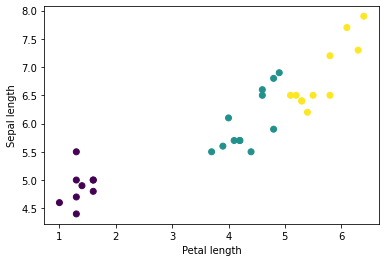

In [10]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show();

In [11]:
def pack_feature_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

train_dataset = train_dataset.map(pack_feature_vector)

In [12]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[5.9 3.  5.1 1.8]
 [7.6 3.  6.6 2.1]
 [5.1 2.5 3.  1.1]
 [6.3 2.3 4.4 1.3]
 [4.4 3.  1.3 0.2]], shape=(5, 4), dtype=float32)


In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

In [14]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.11091045, -1.9786121 ,  1.2023566 ],
       [-0.27231073, -2.3563821 ,  1.4052737 ],
       [-0.22298431, -1.2259164 ,  0.7989577 ],
       [-0.2761562 , -1.607724  ,  1.1053686 ],
       [-0.16495386, -0.70300424,  0.3918057 ]], dtype=float32)>

In [15]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.20522168, 0.03170229, 0.76307607],
       [0.15439168, 0.01920982, 0.82639855],
       [0.24123195, 0.08848444, 0.6702836 ],
       [0.19065669, 0.05034536, 0.758998  ],
       [0.30040005, 0.17539923, 0.52420074]], dtype=float32)>

In [16]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [2 2 1 1 0 0 0 2 0 0 0 1 2 2 1 1 2 0 2 2 0 0 1 0 2 1 2 2 0 2 2 0]


In [17]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y, training):
  _y = model(x, training=training)
  
  return loss_obj(y_true=y, y_pred=_y)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.2173357009887695


In [18]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_val = loss(model, inputs, targets, training=True)
  return loss_val, tape.gradient(loss_val, model.trainable_variables)

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

loss_val, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_val.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.2173357009887695
Step: 1,         Loss: 1.1688135862350464


In [22]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  
  for x, y in train_dataset:
    loss_val, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    epoch_loss_avg.update_state(loss_val)
    epoch_accuracy.update_state(y, model(x, training=True))
    
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.260, Accuracy: 35.000%
Epoch 050: Loss: 0.572, Accuracy: 70.833%
Epoch 100: Loss: 0.432, Accuracy: 88.333%
Epoch 150: Loss: 0.274, Accuracy: 97.500%
Epoch 200: Loss: 0.187, Accuracy: 95.833%


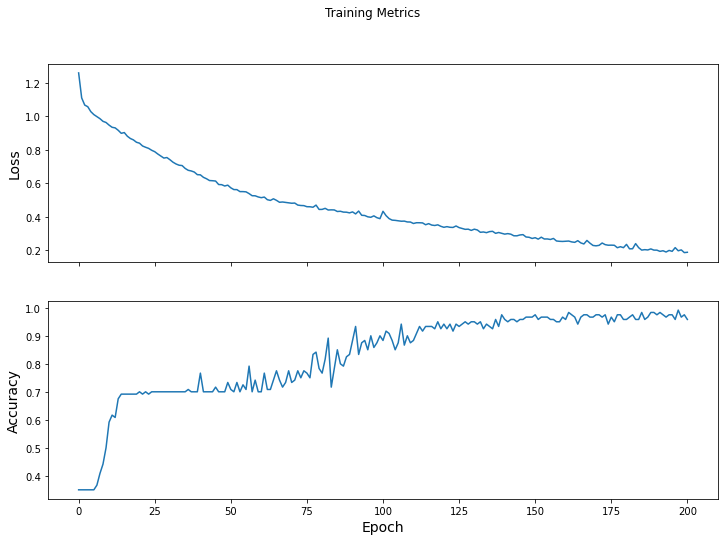

In [23]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [24]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [25]:
test_dataset = tf.data.experimental.make_csv_dataset(
  test_fp,
  batch_size,
  column_names=column_names,
  label_name=label_name,
  num_epochs=1,
  shuffle=False
)

test_dataset = test_dataset.map(pack_feature_vector)

In [26]:
test_accuracy = tf.keras.metrics.Accuracy()

for x, y in test_dataset:
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy.update_state(prediction, y)
  
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [27]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 2],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [29]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (96.2%)
Example 1 prediction: Iris versicolor (71.3%)
Example 2 prediction: Iris virginica (83.4%)
